In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/jhhalls/Online-Exam-Ds0124/main/Sales_LinReg.csv')
df.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [3]:
df.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [5]:
df.shape

(305, 6)

In [6]:
df.isnull().sum()

Republic    10
NDTV         5
TV5          0
TV9          8
AajTak       5
sales        0
dtype: int64

In [57]:
df['Republic'].fillna(df['Republic'].mean(),inplace=True)
df['NDTV'].fillna(df['NDTV'].mean(),inplace=True)
df['TV9'].fillna(df['TV9'].mean(),inplace=True)
df['AajTak'].fillna(df['AajTak'].mean(),inplace=True)
df.isnull().sum()

Republic    0
NDTV        0
TV5         0
TV9         0
AajTak      0
sales       0
dtype: int64

In [58]:
df_corr=df.corr()

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import  warnings
warnings.filterwarnings('ignore')

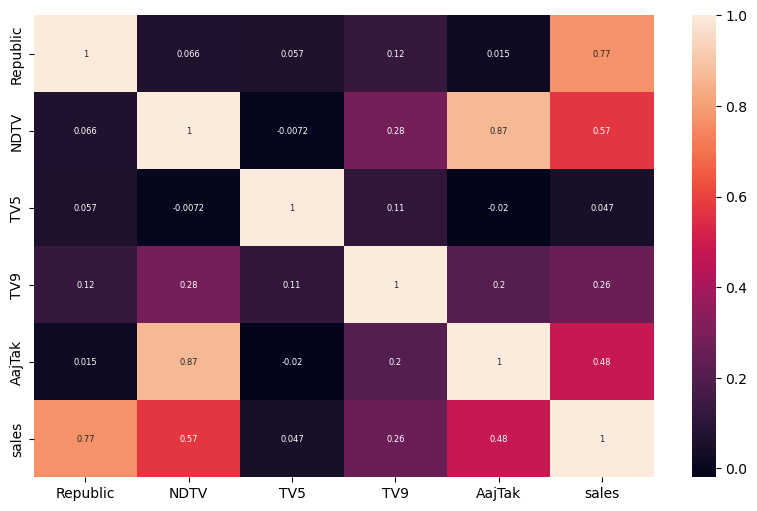

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True,annot_kws={'size':6})
plt.show()

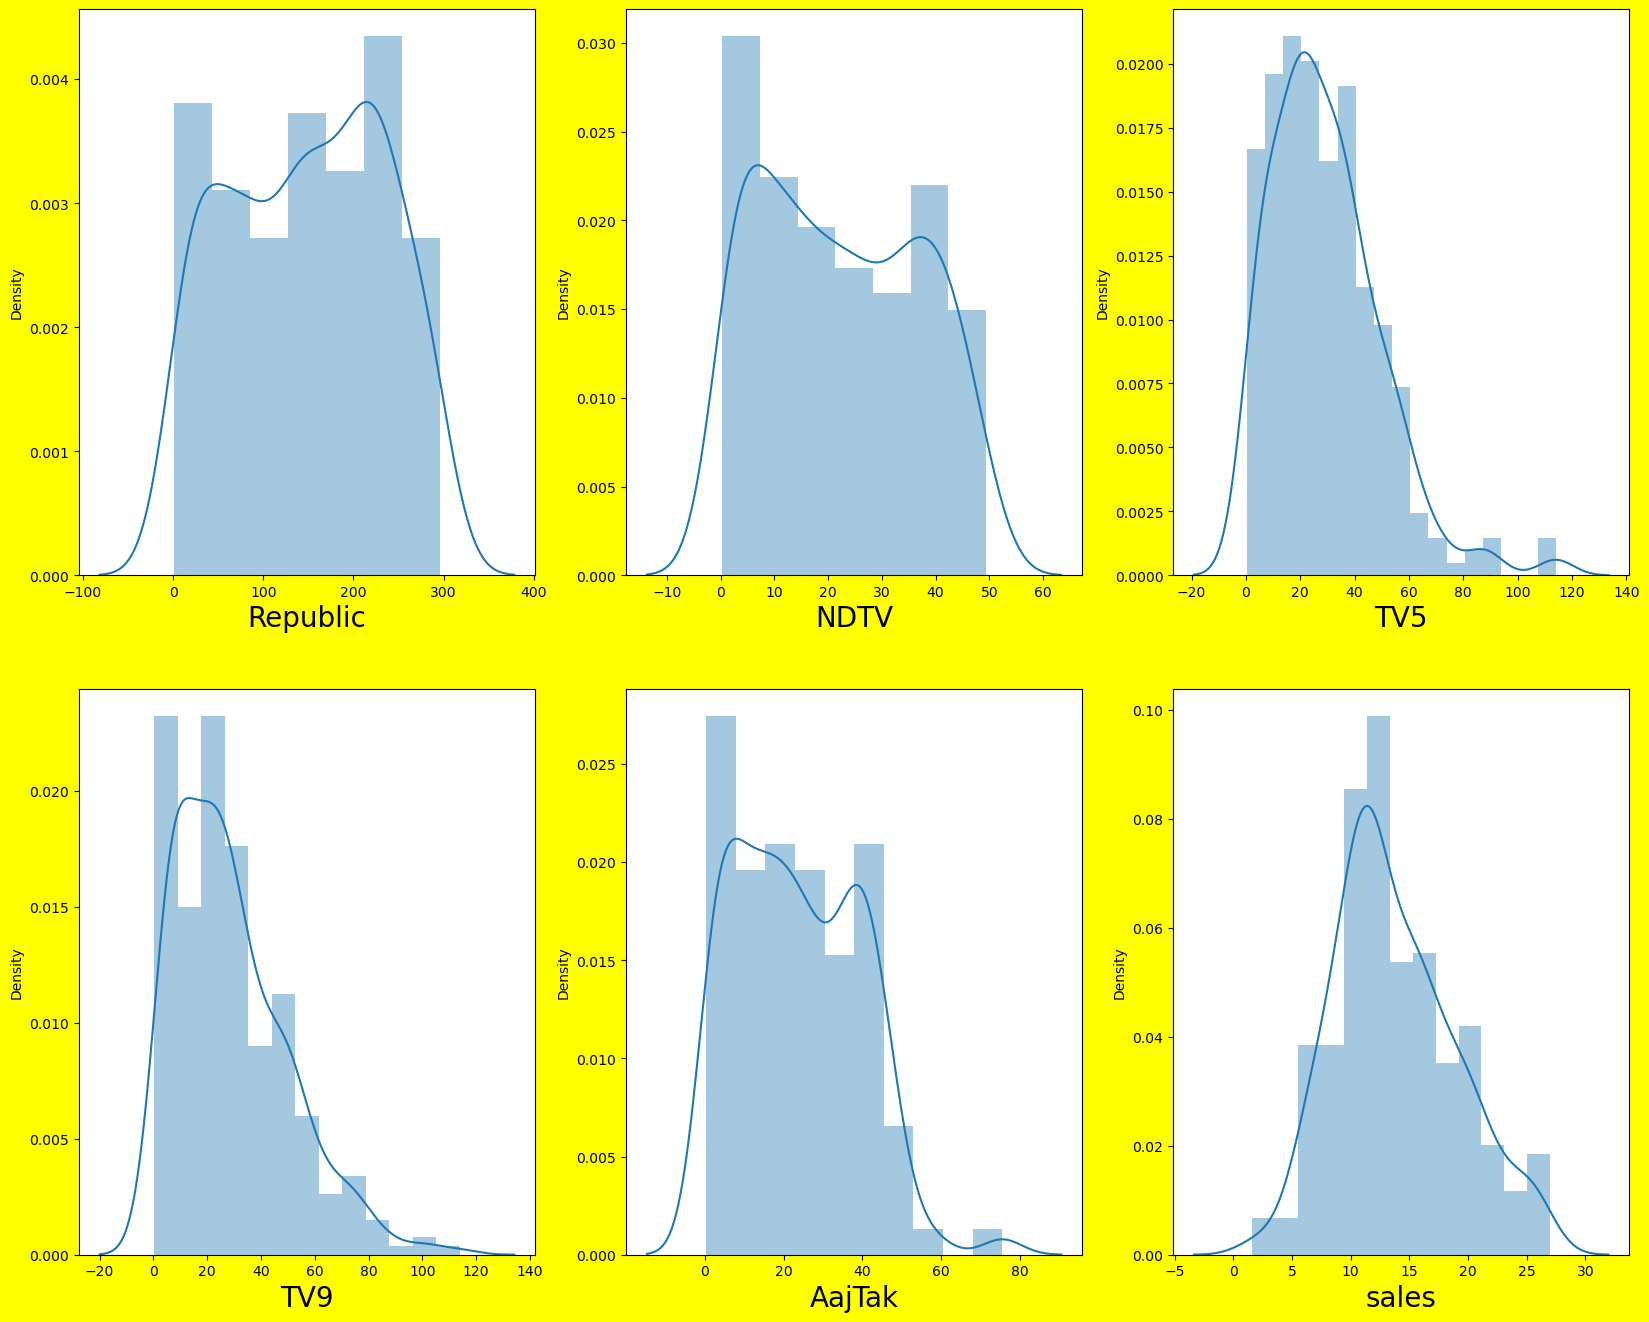

In [61]:
# Data visualization: To observed how the data is distributed

plt.figure(figsize=(20,25),facecolor='yellow')
plotno=1
for columns in df:
    if plotno<=9:
        ax=plt.subplot(3,3,plotno)
        sns.distplot(df[columns])
        plt.xlabel(columns, fontsize=20)
    plotno+=1
plt.show()

Skewness is observed so lets deal with them


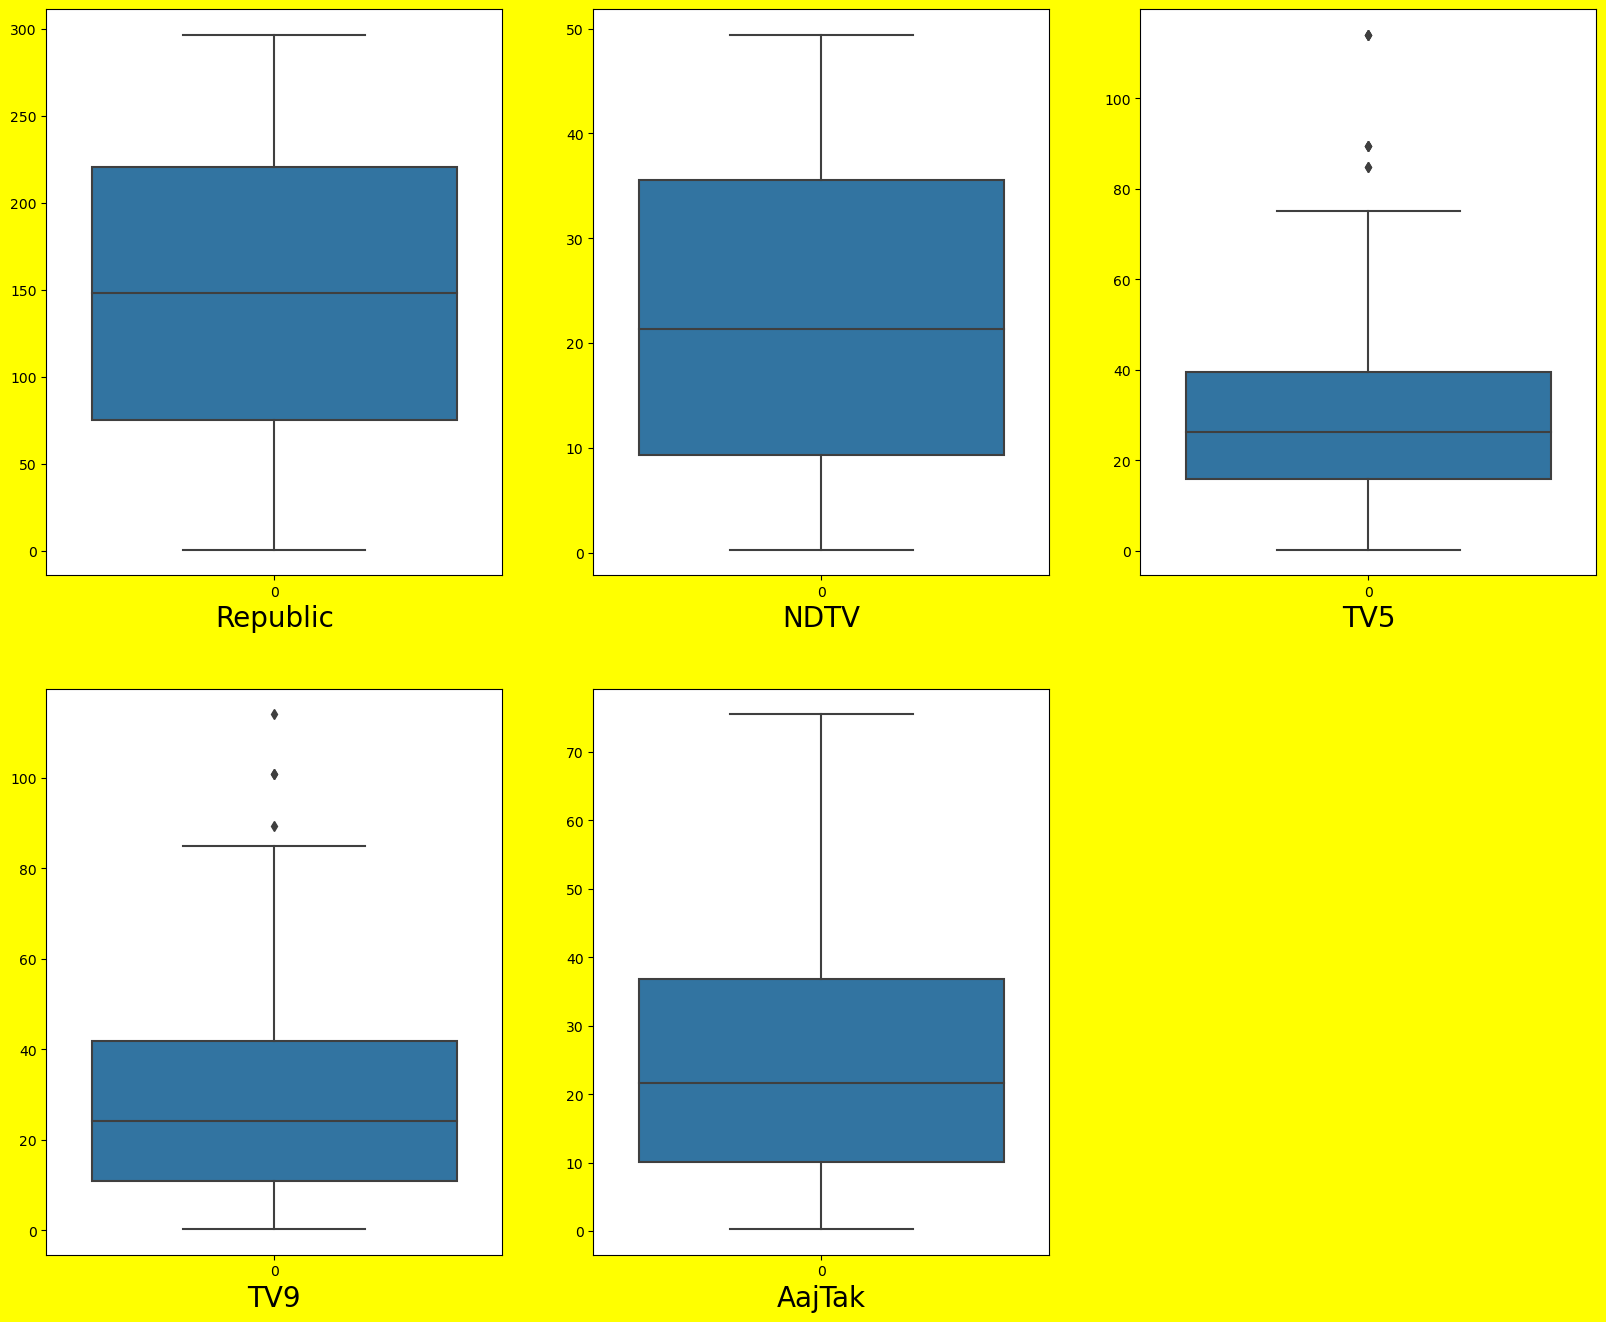

In [62]:
print('Skewness is observed so lets deal with them')
df_feature=df.drop('sales',axis=1)
plt.figure(figsize=(20,25),facecolor='yellow')
plotno=1
for columns in df_feature:
    if plotno<=9:
        ax=plt.subplot(3,3,plotno)
        sns.boxplot(df_feature[columns])
        plt.xlabel(columns, fontsize=20)
    plotno+=1
plt.show()

In [66]:
from sklearn .linear_model import LinearRegression
lm=LinearRegression()

In [70]:
x=df.drop(columns=['sales'])
y=df.sales
lm.fit(x,y)

LinearRegression()

In [71]:
from sklearn.metrics import r2_score

In [72]:
predicted_sales=lm.predict(x)
r2=r2_score(y_true=y,y_pred=predicted_sales)
print(f'{100*r2}% is explained variation')

87.18056262724838% is explained variation
